<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


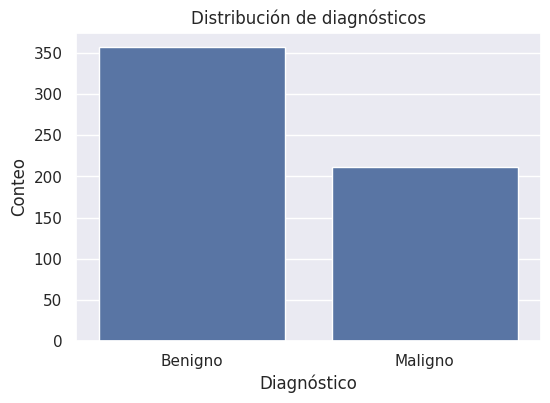

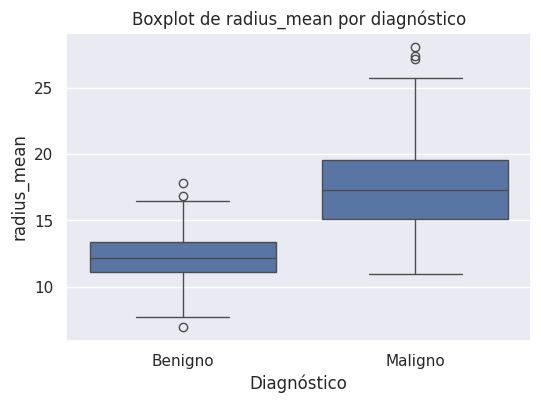

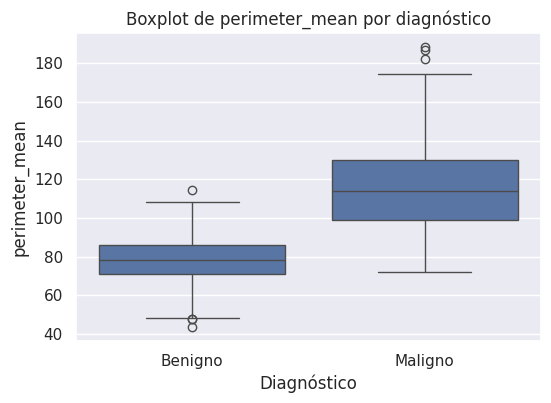

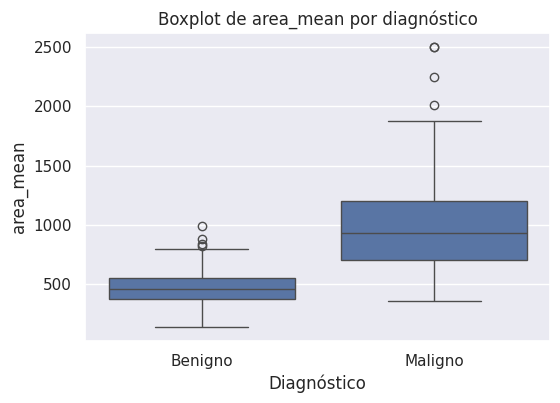

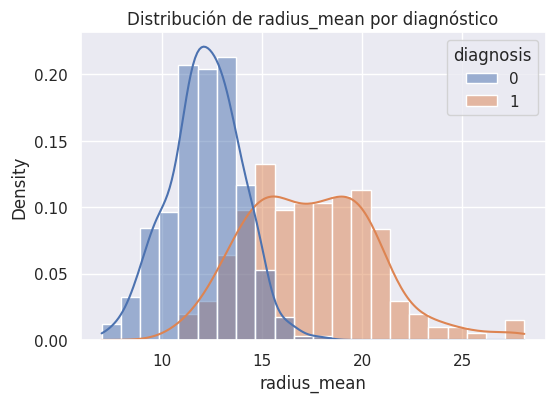

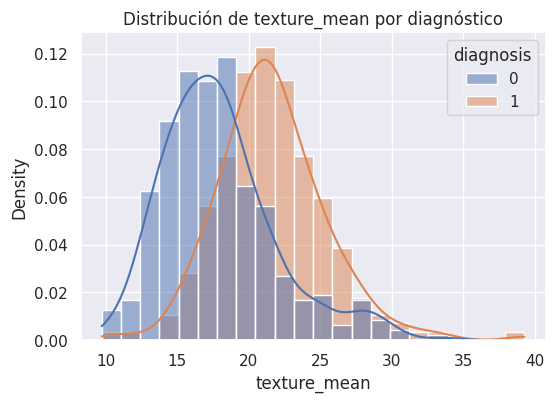

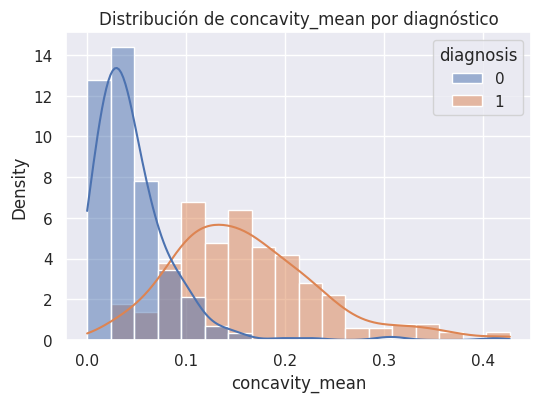

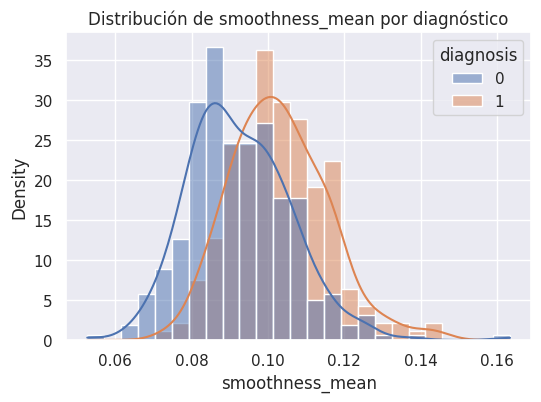

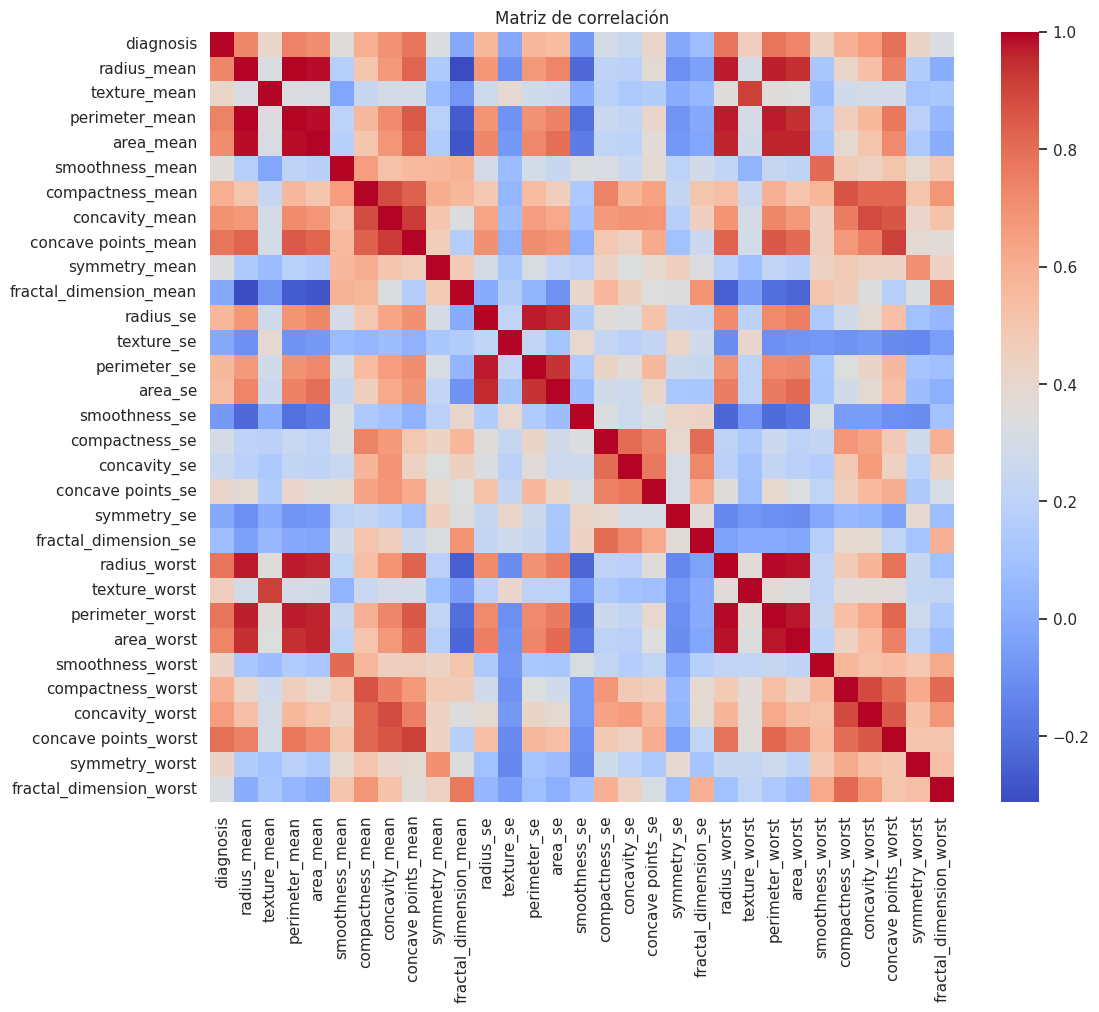

In [2]:
# FIXME
# Distribución de clases
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df)
plt.xticks([0,1], ['Benigno','Maligno'])
plt.title('Distribución de diagnósticos')
plt.xlabel('Diagnóstico')
plt.ylabel('Conteo')
plt.show()

# Diagramas de caja (Boxplots) de algunas características por clase
features_box = ['radius_mean', 'perimeter_mean', 'area_mean']
for feature in features_box:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.xticks([0,1], ['Benigno','Maligno'])
    plt.xlabel('Diagnóstico')
    plt.ylabel(feature)
    plt.title(f'Boxplot de {feature} por diagnóstico')
    plt.show()

# Histogramas por clase para algunas características
features_hist = ['radius_mean', 'texture_mean', 'concavity_mean', 'smoothness_mean']
for feature in features_hist:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, stat='density', common_norm=False)
    plt.xlabel(feature)
    plt.title(f'Distribución de {feature} por diagnóstico')
    plt.show()

# Matriz de correlación de características
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()



2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [3]:
# FIXME
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.90)]
if to_drop:
    print("Características eliminadas por alta correlación:", to_drop)
    X = X.drop(columns=to_drop)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Características eliminadas por alta correlación: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']



3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


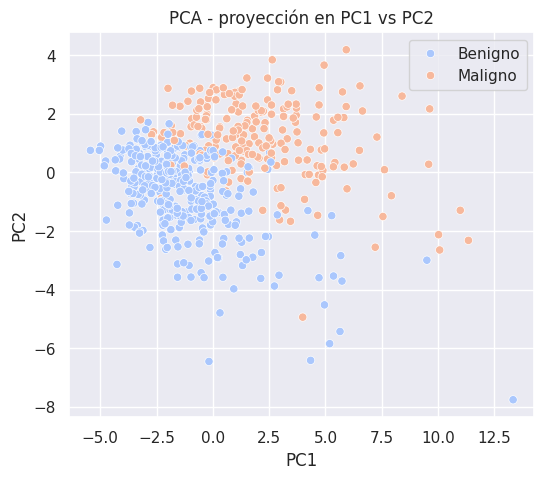

Varianza explicada (PC1, PC2): [0.426 0.135]


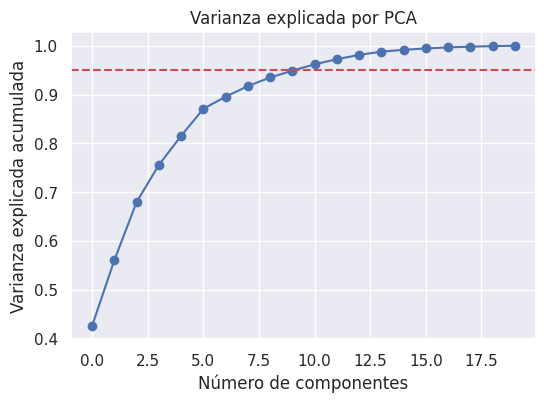

In [4]:
# FIXME
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizacion
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - proyección en PC1 vs PC2')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Benigno','Maligno'])
plt.show()

print(f'Varianza explicada (PC1, PC2): {np.round(pca.explained_variance_ratio_,3)}')

pca_full = PCA(n_components=X_scaled.shape[1]).fit(X_scaled)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada por PCA')
plt.axhline(0.95, color='r', linestyle='--')
plt.show()



4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [5]:
# FIXME
from sklearn.metrics import roc_auc_score

models = {
    'Regresión Logística': (LogisticRegression(max_iter=10000), {'C': [0.01, 0.1, 1, 10]}),
    'SVM': (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [None, 5, 10]})
}

best_models = {}
for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"{name}: Mejor CV accuracy = {grid.best_score_:.3f}, params = {grid.best_params_}")

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        roc = roc_auc_score(y_test, y_prob)
    else:
        roc = None
    print(f"{name}: Accuracy={acc:.3f}, Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}, AUC-ROC={roc:.3f}")
    cm = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicho'))
    print("Matriz de confusión:\n", cm, "\n")


Regresión Logística: Mejor CV accuracy = 0.978, params = {'C': 1}
SVM: Mejor CV accuracy = 0.974, params = {'C': 0.1, 'kernel': 'linear'}
Random Forest: Mejor CV accuracy = 0.954, params = {'max_depth': 10, 'n_estimators': 100}
Regresión Logística: Accuracy=0.982, Precision=0.977, Recall=0.977, F1=0.977, AUC-ROC=0.997
Matriz de confusión:
 Empty DataFrame
Columns: []
Index: [] 

SVM: Accuracy=0.965, Precision=0.933, Recall=0.977, F1=0.955, AUC-ROC=0.997
Matriz de confusión:
 Empty DataFrame
Columns: []
Index: [] 

Random Forest: Accuracy=0.965, Precision=0.953, Recall=0.953, F1=0.953, AUC-ROC=0.991
Matriz de confusión:
 Empty DataFrame
Columns: []
Index: [] 




5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



In [7]:
# FIXME


• **Modelo**: SVM (RBF) si buscas máximo recall/F1; Regresión Logística si priorizas interpretabilidad y calibración.  
• **Preprocesamiento**: Escalado y control de colinealidad son críticos; sin ellos caen las métricas. PCA ayuda a visualizar/regularizar, pero si es muy agresivo puede perder señal.  
• **Mejoras**: optimizar umbral para recall alto, calibrar probabilidades, usar validación estratificada con Pipeline, considerar class_weight/SMOTE si hay desbalance y añadir SHAP para explicabilidad.
